In [86]:
import numpy as numpy
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sn

dataset = pd.read_csv('./merged_dataset.csv')

dataset.head()

,Year,State,co,no2,o3,pm25,so2,Deaths
0,2000,Alabama,0.324396,5.983593,57.601273,15.064598,3.251818,3064.0
1,2000,Arkansas,0.327984,6.059882,53.942551,12.076962,2.859271,2027.0
2,2000,Arizona,0.422265,9.915901,58.282240,7.400383,2.343078,2574.0
3,2000,California,0.462393,10.756098,48.635815,10.896779,1.930857,14060.0
4,2000,Colorado,0.383861,8.429847,59.836639,5.501561,2.511782,1463.0


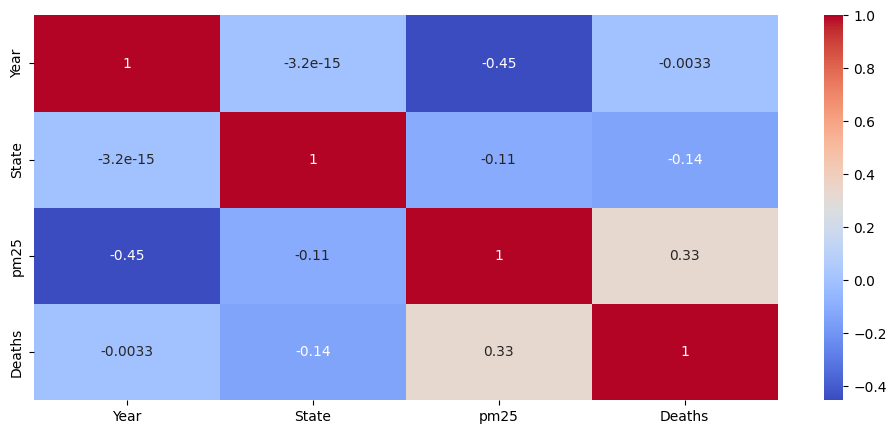

In [102]:
dataset_temp = dataset.drop(columns=['State', 'co', 'no2', 'o3', 'so2', 'o3'])
cor=dataset_temp.corr()
plt.figure(figsize=(12,5))
sn.heatmap(dataset_temp.corr(),annot=True, cmap ='coolwarm')
plt.show()

In [88]:
dataset['State']

0            Alabama
1           Arkansas
2            Arizona
3         California
4           Colorado
           ...      
763          Vermont
764       Washington
765        Wisconsin
766    West Virginia
767          Wyoming
Name: State, Length: 768, dtype: object

In [89]:
# Create a dictionary to map state abbreviations to state names
state_mapping = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DE': 'Delaware',
    'DC': 'District of Columbia',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming',
    'AS': 'American Samoa',
    'GU': 'Guam',
    'MP': 'Northern Mariana Islands',
    'PR': 'Puerto Rico',
    'VI': 'Virgin Islands',
    'TT': 'Trust Territories'
}
float_state_mapping = {state_mapping[abbr]: float(index + 1) for index, abbr in enumerate(state_mapping.keys())}
float_state_mapping

{'Alabama': 1.0,
 'Alaska': 2.0,
 'Arizona': 3.0,
 'Arkansas': 4.0,
 'California': 5.0,
 'Colorado': 6.0,
 'Connecticut': 7.0,
 'Delaware': 8.0,
 'District of Columbia': 9.0,
 'Florida': 10.0,
 'Georgia': 11.0,
 'Hawaii': 12.0,
 'Idaho': 13.0,
 'Illinois': 14.0,
 'Indiana': 15.0,
 'Iowa': 16.0,
 'Kansas': 17.0,
 'Kentucky': 18.0,
 'Louisiana': 19.0,
 'Maine': 20.0,
 'Maryland': 21.0,
 'Massachusetts': 22.0,
 'Michigan': 23.0,
 'Minnesota': 24.0,
 'Mississippi': 25.0,
 'Missouri': 26.0,
 'Montana': 27.0,
 'Nebraska': 28.0,
 'Nevada': 29.0,
 'New Hampshire': 30.0,
 'New Jersey': 31.0,
 'New Mexico': 32.0,
 'New York': 33.0,
 'North Carolina': 34.0,
 'North Dakota': 35.0,
 'Ohio': 36.0,
 'Oklahoma': 37.0,
 'Oregon': 38.0,
 'Pennsylvania': 39.0,
 'Rhode Island': 40.0,
 'South Carolina': 41.0,
 'South Dakota': 42.0,
 'Tennessee': 43.0,
 'Texas': 44.0,
 'Utah': 45.0,
 'Vermont': 46.0,
 'Virginia': 47.0,
 'Washington': 48.0,
 'West Virginia': 49.0,
 'Wisconsin': 50.0,
 'Wyoming': 51.0,
 'Amer

In [90]:
# Replace 'state_abbr' with state names using the mapping
dataset['State'] = dataset['State'].map(float_state_mapping)
dataset['State']

0       1.0
1       4.0
2       3.0
3       5.0
4       6.0
       ... 
763    46.0
764    48.0
765    50.0
766    49.0
767    51.0
Name: State, Length: 768, dtype: float64

In [91]:
X = dataset.drop(columns=['Deaths'])
Y = dataset['Deaths']

In [92]:
Y.head()

0     3064.0
1     2027.0
2     2574.0
3    14060.0
4     1463.0
Name: Deaths, dtype: float64

In [93]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=3)
print(X.shape, X_train.shape, X_test.shape)


(768, 7) (614, 7) (154, 7)


In [94]:

model = LogisticRegression(solver='lbfgs', max_iter=1000)
# training the Logistic Regression model with training data
model.fit(X_train, Y_train)

# Module Eval - Accuracy score

# accuracy on training data
X_train_prediction = model.predict(X_train)

print(X_train_prediction)

training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)


[  347.  1607.  7039.  3805.  8004.   560.  3200.  3235.   309.  1985.
   560.  9467.   406.  2183.   995.   226.  2434.  1344.  2869. 13779.
  1797.  2101. 13779.  1536.  2380. 13549.  2246.  3333.   560.  2064.
  3039.  5872.   240.  2276.  1549.   562.  2152.  2495.  1782.  2431.
   545.  4111.   240.  6108.  8816.   969.  4110.  2434.   463.   347.
  2431.  1595.  1355. 12466.  4068.  1536.  2871.  3202.   713.   969.
  4568.  1894.   584.  3106.   436. 12302.   332.  6792.   560.  2434.
  4604.  2871.  7976.  4571.  3274.   717.  2041.  2434.   382.   381.
   952.   341.  3200.   214.  4171.  2408.  1562.   952.  4072.  9485.
   595.  1589.   601.  3127.  2922.  1354.  3064. 12335.   358. 12743.
   489.   320.  5813.  2431.   972.  2977.   981.   969.  2691.   986.
   493. 12335.  3200.  8353.   507.   302.  2110.  5944.   969.  1344.
  1595.  9611.  4026.   360.  2434.   972.  1852.   493.  2871.  1009.
  3916.  7607.  4288.  1355.  2434.  2183.  1797.  6108.   969.  6988.
  1355

c:\Users\Ayushee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [95]:
# accuracy on test data
X_test_prediction = model.predict(X_test)

test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.012987012987012988


In [96]:
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 5, random_state = 18).fit(X_train, Y_train)

In [97]:
from sklearn.metrics import mean_squared_error


prediction = rf.predict(X_test)
mse = mean_squared_error(Y_test, prediction)
rmse = mse**.5
print(mse)
print(rmse)

6798915.813797743
2607.473070579588


In [101]:
feature_importances = rf.feature_importances_

# Display feature importances
for i, importance in enumerate(feature_importances):
    print(f"Feature {i+1}: {importance:.4f}")

# Define a threshold for feature importance
threshold = 0.05  # Adjust this value based on your specific problem

# Identify the indices of important features
important_feature_indices = np.where(feature_importances > threshold)[0]

# Select the important features from your feature matrix
X_selected = X[:, important_features]

Feature 1: 0.0329
Feature 2: 0.2327
Feature 3: 0.0883
Feature 4: 0.1042
Feature 5: 0.1100
Feature 6: 0.3248
Feature 7: 0.1071


NameError: name 'np' is not defined